# 출처 : 퀀트 전략을 위한 인공지능 트레이딩 103~109p

#바이앤홀드 전략 : 주식을 매수한 후 장기 보유하는 투자 전략.
#                 도중에 주가가 하락하여도 장기적으로 값이 오르는 우상향을 기대하고 실시하는 투자 방법이다.

In [2]:
#데이터 로드 및 확인

import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/퀀트 전략을 위한 인공지능 트레이딩/바이앤홀드 전략/AMZN.csv",parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
2,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
3,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
4,1997-05-22,1.437500,1.447917,1.312500,1.395833,1.395833,11776800


In [4]:
#결측치 확인

df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

,Date,Open,High,Low,Close,Adj Close,Volume


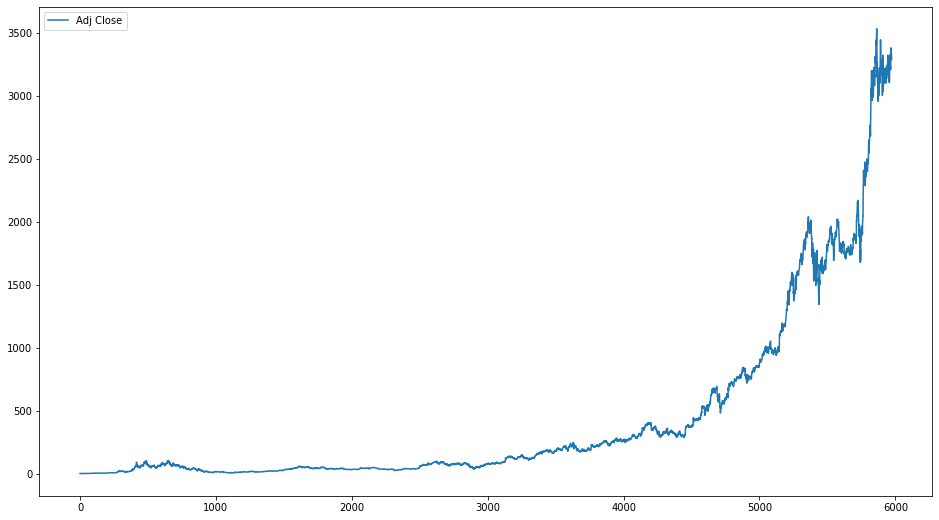

In [5]:
#데이터 슬라이싱

price_df = df.loc[:,['Adj Close']].copy()
price_df.plot(figsize=(16,9))

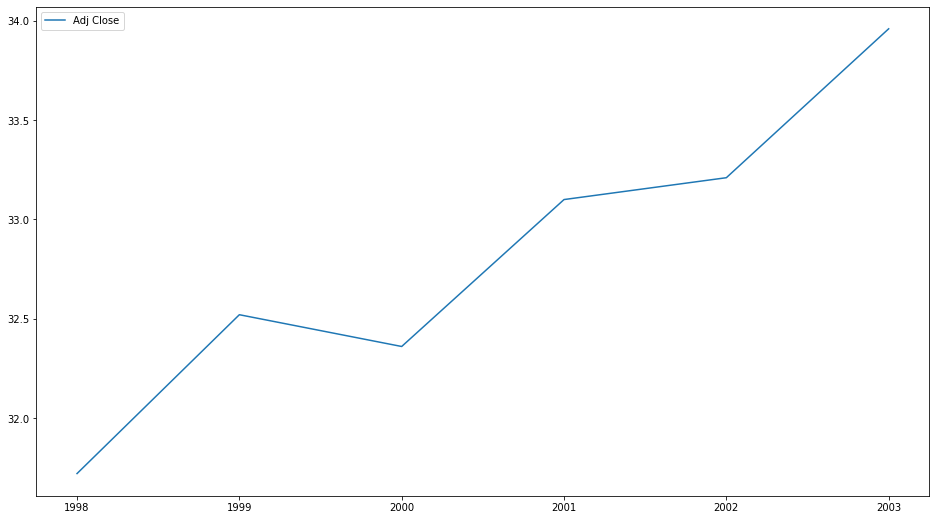

In [6]:
from_date = '1997-01-03'
to_date = '2003-01-03'
price_df.loc[from_date:to_date].plot(figsize=(16,9))
#106페이지의 코드를 그대로 적용하여 작성하였는데 출력되는 결과 그래프가 다르다.

In [7]:
#일별 수익률 계산
price_df['daily_rtn'] = price_df['Adj Close'].pct_change()
price_df.head(10)

,Adj Close,daily_rtn
0,1.729167,NaN
1,1.708333,-0.012049
2,1.635417,-0.042683
3,1.427083,-0.127389
4,1.395833,-0.021898
5,1.500000,0.074627
6,1.583333,0.055555
7,1.531250,-0.032895
8,1.505208,-0.017007
9,1.500000,-0.003460


In [8]:
#바이앤홀드 전략의 누적곱 계산
price_df['st_rtn'] = (1+price_df['daily_rtn']).cumprod()
price_df.head(10)

,Adj Close,daily_rtn,st_rtn
0,1.729167,NaN,NaN
1,1.708333,-0.012049,0.987951
2,1.635417,-0.042683,0.945783
3,1.427083,-0.127389,0.825301
4,1.395833,-0.021898,0.807229
5,1.500000,0.074627,0.867470
6,1.583333,0.055555,0.915662
7,1.531250,-0.032895,0.885542
8,1.505208,-0.017007,0.870482
9,1.500000,-0.003460,0.867470


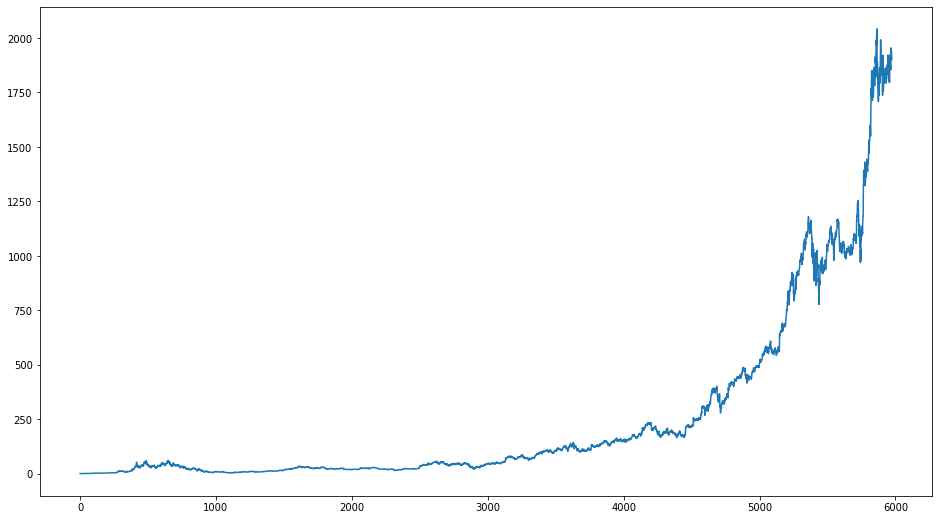

In [9]:
price_df['st_rtn'].plot(figsize=(16,9))

In [27]:
#다른시점을 기준으로 수익률 계산
base_date = '2010-01-03'
tmp_df = price_df.loc[base_date:,['st_rtn']] / price_df.loc[base_date,['st_rtn']]
last_date = tmp_df.index[-1]
print('누적 수익 : ', tmp_df.loc[last_date,'st_rtn'])
tmp_df.plot(figsize=(16,9))


KeyError: ignored